In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
#import mplcursors
from sklearn.neighbors import NearestNeighbors

bt = pd.read_csv('data_d_kor.csv', low_memory=False)
NaN_processing_bt = bt.fillna(0) # nan 0으로 처리
indexing_bt = NaN_processing_bt.set_index('date') #인덱스 날짜로 변경
print(indexing_bt.head())

              gold  commodity  k10bond   kospi
date                                          
2000-01-03  0.0000    -0.0016      0.0  0.0000
2000-01-04 -0.0201    -0.0096      0.0  0.0301
2000-01-05 -0.0057    -0.0096      0.0 -0.0687
2000-01-06  0.0011    -0.0005      0.0 -0.0259
2000-01-07  0.0018    -0.0098      0.0 -0.0126


In [2]:
def Select_Date(Start, End, Dataframe) :   # 구간 데이터 모으는 함수
    """
    gold = gold.loc['{}'.format(Start):'{}'.format(End), 'gold']
    u10bond = u10bond.loc['{}'.format(Start):'{}'.format(End),'u10bond']
    snp500= snp500.loc['{}'.format(Start):'{}'.format(End) ,'snp500']
    commodity= commodity.loc['{}'.format(Start):'{}'.format(End), 'commodity']
    """
    total = indexing_bt.loc['{}'.format(Start):'{}'.format(End)]

    Dataframe = pd.concat([Dataframe,total]) # 리스트형식.. tqtqtqtqtqtq
    return Dataframe


def Get_randomized_weights():

    a = random.randrange(0, 21)
    b = random.randrange(0, 21-a)
    c = random.randrange(0, 21-a-b)
    d = random.randrange(0, 21-a-b-c)
    e = 20-a-b-c-d

    array = np.array([a,b,c,d,e])*5
    return array

def Analysis(Dataframe):
    """
    print(Dataframe.idxmax())

    print('----------Return Max------------')
    print(Dataframe.loc[Dataframe.idxmax()[0]])
    print('----------Sharpe Max------------')
    print(Dataframe.loc[Dataframe.idxmax()[2]])
    print('----------MDD Min------------')
    print(Dataframe.loc[Dataframe.idxmax()[1]])
    print('----------Volatility Min------------')
    print(Dataframe.loc[Dataframe.idxmin()[3]])
    """

    KNN(Dataframe)


def KNN(Dataframe):


    M = 10 # 이웃 몇개 채취할거임?

    x = Dataframe.iloc[:, 2]  # 샤프
    x = x.values.reshape(len(Dataframe),1) # fit 시키기 위해 변형

    neighbor = NearestNeighbors(n_neighbors=M, radius=0.4)
    neighbor.fit(x)


    nparray1 = neighbor.kneighbors(Dataframe.iloc[Dataframe.idxmax()[2], 2].reshape(-1, 1), M, return_distance=False)
    #print(Dataframe.loc[Dataframe.idxmax()[2]])
    #print(Dataframe.iloc[nparray1[0]])

    kospi = 0
    k10bond = 0
    gold = 0
    commodity = 0


    for i in range(0, M):

        kospi += Dataframe.loc[nparray1[0][i], 'kospi']
        k10bond += Dataframe.loc[nparray1[0][i], 'k10bond']
        gold += Dataframe.loc[nparray1[0][i], 'gold']
        commodity += Dataframe.loc[nparray1[0][i], 'commodity']

    print("\n높은 Sharpe 지수를 가진 상위 {}개의 포트폴리오를 샘플링하여 평균낸 결과 \n시장 지수 추종 주식 {}%, 국채 10년 {}%, 금 {}%, 원자재 {}% 포트폴리오가 제안되었습니다. ".format(M, kospi/M, k10bond/M, gold/M, commodity/M))

    print("\n가장 높은 Sharpe 지수를 보인 포트폴리오는 아래와 같습니다. ")
    print(Dataframe.loc[Dataframe.idxmax()[2]])



def Scatter(Dataframe):

    # scatter
    plt.subplots(figsize=[10, 10])
    scatter1 = plt.scatter(Dataframe['Volatility'], Dataframe['Return %'], marker='o', s=10, alpha=0.5) #알파는 투명도


#    cursor1 = mplcursors.cursor(scatter1, hover=True)
#    cursor1.connect("add", lambda sel: sel.annotation.set_text('Portfolio \n Index : {}\n Return : {}%\n Volatility : {}\n Sharpe : {}\n MDD : {}%\n snp500 : {}\n u10bond : {}\n k5bond : {}\n gold : {}\n commodity : {}'.format(sel.target.index, sel.target[1], sel.target[0], Dataframe.iloc[sel.target.index, 2], Dataframe.iloc[sel.target.index, 1], Dataframe.iloc[sel.target.index, 4], Dataframe.iloc[sel.target.index, 5], Dataframe.iloc[sel.target.index, 6], Dataframe.iloc[sel.target.index, 7], Dataframe.iloc[sel.target.index, 8])))


    plt.scatter(Dataframe.iloc[Dataframe.idxmax()[2], 3], Dataframe.iloc[Dataframe.idxmax()[2], 0], marker='x', c='red', s=15)
    plt.annotate('Sharpe Max', fontsize=10, xy=(Dataframe.iloc[Dataframe.idxmax()[2], 3], Dataframe.iloc[Dataframe.idxmax()[2], 0]), xytext=(Dataframe.iloc[Dataframe.idxmax()[2], 3] -0.03 , Dataframe.iloc[Dataframe.idxmax()[2], 0]+0.15))

    plt.scatter(Dataframe.iloc[Dataframe.idxmin()[3], 3], Dataframe.iloc[Dataframe.idxmin()[3], 0], marker='x', c='red',s=15)
    plt.annotate('Volatility Min', fontsize=10, xy=(Dataframe.iloc[Dataframe.idxmin()[3], 3], Dataframe.iloc[Dataframe.idxmin()[3], 0]),
                 xytext=(Dataframe.iloc[Dataframe.idxmin()[3], 3] - 0.03, Dataframe.iloc[Dataframe.idxmin()[3], 0] + 0.15), )

    plt.scatter(Dataframe.iloc[Dataframe.idxmax()[0], 3], Dataframe.iloc[Dataframe.idxmax()[0], 0], marker='x', c='red',
                s=15)
    plt.annotate('Return Max', fontsize=10,
                 xy=(Dataframe.iloc[Dataframe.idxmax()[0], 3], Dataframe.iloc[Dataframe.idxmax()[0], 0]), xytext=(
        Dataframe.iloc[Dataframe.idxmax()[0], 3] - 0.03, Dataframe.iloc[Dataframe.idxmax()[0], 0] + 0.15))

    plt.scatter(Dataframe.iloc[Dataframe.idxmax()[1], 3], Dataframe.iloc[Dataframe.idxmax()[1], 0], marker='x', c='red',
                s=15)
    plt.annotate('MDD Min', fontsize=10,
                 xy=(Dataframe.iloc[Dataframe.idxmax()[1], 3], Dataframe.iloc[Dataframe.idxmax()[1], 0]), xytext=(
        Dataframe.iloc[Dataframe.idxmax()[1], 3] - 0.03, Dataframe.iloc[Dataframe.idxmax()[1], 0] + 0.15))

    #람다식

    plt.xlabel('Volatility')
    plt.ylabel('Return')
    plt.show()






In [3]:


def Backtesting_all(Data): # 10~50
    array_bt_all = pd.DataFrame()
    t = 0
    for a in range(0, 26):
        print("{} percent...".format(a*5)  )
        a += 5
        
        for b in range(0, 26):
            b += 5
            if a + b > 40:
                break
            for c in range(0, 26):
                c += 5
                if a + b + c > 45:
                    break
                    
                d = 50 - a - b - c
                if d > 30:
                    break

                    
                 

                random_weight = np.array([a, b, c, d]) * 2

                kospi = random_weight[0]
                k10bond = random_weight[1]
                gold = random_weight[2]
                commodity = random_weight[3]


                list_for_mdd = []
                list_for_var = []

                R = None

                for i in range(0, len(Data)):
                    gold = gold * (1 + Data['gold'][i])                      # [i] 값은 행을 의미함. (1+값)인 이유는 증감률이니깐
                    k10bond = k10bond * (1 + Data['k10bond'][i])
                    kospi = kospi * (1 + Data['kospi'][i])
                    commodity = commodity * (1 + Data['commodity'][i])

                    sum_for_mdd_var = gold + k10bond + kospi + commodity
                    list_for_mdd.append(sum_for_mdd_var)

                    if R:  # 분산 구하기 위한 
                        r = (sum_for_mdd_var - R) / R * 100
                        list_for_var.append(r)

                    R = sum_for_mdd_var

                rate_of_return = (gold + k10bond + kospi + commodity - 100)
                Max = max(list_for_mdd)
                Min = min(list_for_mdd)
                Mdd = (Min - Max) / Max * 100

                var_portfolio = np.array(list_for_var).var()  # 분산_ 모집단 전체 대상 varp
                Volatility_standard_deviation = np.sqrt(var_portfolio)
                Sharpe_ratio = (rate_of_return/100) / Volatility_standard_deviation  # expected_return / portfolio_volatility
                    # print(var_portfolio)
                    # print(Volatility_standard_deviation)

                infor_dataframe = pd.DataFrame(
                    {'Return %': [round(rate_of_return, 4)], 'MDD %': [round(Mdd, 4)], 'Sharpe': [round(Sharpe_ratio, 4)],
                     'Volatility': [round(Volatility_standard_deviation, 4)],
                     'kospi': [random_weight[0]], 'k10bond': [random_weight[1]],
                     'gold': [random_weight[2]], 'commodity': [random_weight[3]]},
                    index=[t])

                array_bt_all = pd.concat([array_bt_all, infor_dataframe])

                t += 1
       
    return array_bt_all

Colected_Data = pd.DataFrame()
array_for_sort = pd.DataFrame()
all_array_for_sort = pd.DataFrame()

#백테스팅 날짜 선택하세요 xxxx-xx 형식 지킬것

Colected_Data = Select_Date('2000-09', '2000-11', Colected_Data) 
Colected_Data = Select_Date('2001-12', '2002-02', Colected_Data) 
Colected_Data = Select_Date('2002-10', '2003-01', Colected_Data) 
Colected_Data = Select_Date('2003-11', '2008-01', Colected_Data)
Colected_Data = Select_Date('2009-04', '2009-06', Colected_Data) 
Colected_Data = Select_Date('2010-09', '2011-07', Colected_Data)
Colected_Data = Select_Date('2014-10', '2016-10', Colected_Data) 
#Colected_Data = Select_Date('2017-10', '2018-06', Colected_Data)
#Colected_Data = Select_Date('2020-09', '2021-01', Colected_Data) 
#Colected_Data = Select_Date('2021-09', '2022-02', Colected_Data) 


print(Colected_Data)

"""
hmm kor
G == 0:
Colected_Data = Select_Date('2001-01', '2001-10', Colected_Data) 
Colected_Data = Select_Date('2008-04', '2009-02', Colected_Data) 

G == 1:
Colected_Data = Select_Date('2000-11', '2001-01', Colected_Data) 
Colected_Data = Select_Date('2001-10', '2001-12', Colected_Data) 
Colected_Data = Select_Date('2003-01', '2003-11', Colected_Data)
Colected_Data = Select_Date('2008-01', '2008-04', Colected_Data) 
Colected_Data = Select_Date('2009-02', '2009-04', Colected_Data) 
Colected_Data = Select_Date('2011-07', '2014-10', Colected_Data) 
#Colected_Data = Select_Date('2018-06', '2020-09', Colected_Data) 
#Colected_Data = Select_Date('2022-02', '2022-08', Colected_Data)

G == 2:
Colected_Data = Select_Date('2000-09', '2000-11', Colected_Data) 
Colected_Data = Select_Date('2001-12', '2002-02', Colected_Data) 
Colected_Data = Select_Date('2002-10', '2003-01', Colected_Data) 
Colected_Data = Select_Date('2003-11', '2008-01', Colected_Data)
Colected_Data = Select_Date('2009-04', '2009-06', Colected_Data) 
Colected_Data = Select_Date('2010-09', '2011-07', Colected_Data)
Colected_Data = Select_Date('2014-10', '2016-10', Colected_Data) 
#Colected_Data = Select_Date('2017-10', '2018-06', Colected_Data)
#Colected_Data = Select_Date('2020-09', '2021-01', Colected_Data) 
#Colected_Data = Select_Date('2021-09', '2022-02', Colected_Data) 


G == 3:
Colected_Data = Select_Date('2000-01', '2000-09', Colected_Data) 
Colected_Data = Select_Date('2002-02', '2002-10', Colected_Data)
Colected_Data = Select_Date('2009-06', '2010-09', Colected_Data) 
Colected_Data = Select_Date('2016-10', '2017-01', Colected_Data) 
#Colected_Data = Select_Date('2016-10', '2017-10', Colected_Data) 원본포인트
#Colected_Data = Select_Date('2021-01', '2021-09', Colected_Data) 
"""


"""
hmm uaa
G == 0:
Colected_Data = Select_Date('2001-01', '2002-02', Colected_Data) 
Colected_Data = Select_Date('2002-07', '2003-08', Colected_Data) 
Colected_Data = Select_Date('2008-08', '2010-01', Colected_Data) 
#Colected_Data = Select_Date('2020-02', '2020-11', Colected_Data) 

G == 1:
Colected_Data = Select_Date('2000-09', '2001-01', Colected_Data) 
Colected_Data = Select_Date('2002-02', '2002-07', Colected_Data) 
Colected_Data = Select_Date('2003-08', '2003-11', Colected_Data)
Colected_Data = Select_Date('2008-07', '2008-08', Colected_Data) 
Colected_Data = Select_Date('2010-01', '2013-03', Colected_Data) 
Colected_Data = Select_Date('2015-06', '2017-01', Colected_Data) 
#Colected_Data = Select_Date('2015-06', '2017-10', Colected_Data)  원본포인트
#Colected_Data = Select_Date('2018-11', '2020-02', Colected_Data) 
#Colected_Data = Select_Date('2020-11', '2021-03', Colected_Data)
#Colected_Data = Select_Date('2021-12', '2022-08', Colected_Data)

G == 2:
Colected_Data = Select_Date('2000-01', '2000-09', Colected_Data) 
Colected_Data = Select_Date('2003-11', '2006-10', Colected_Data) 
Colected_Data = Select_Date('2008-02', '2008-07', Colected_Data) 
Colected_Data = Select_Date('2013-03', '2015-06', Colected_Data)
#Colected_Data = Select_Date('2017-10', '2018-11', Colected_Data) 
#Colected_Data = Select_Date('2021-03', '2021-12', Colected_Data)



G == 3:
Colected_Data = Select_Date('2006-10', '2008-02', Colected_Data) 

"""






              gold  commodity   k10bond   kospi
date                                           
2000-09-01 -0.0047     0.0037  0.000000  0.0052
2000-09-04  0.0000     0.0000  0.000000 -0.0157
2000-09-05 -0.0043     0.0126  0.000000 -0.0030
2000-09-06 -0.0058     0.0170  0.000000 -0.0038
2000-09-07 -0.0007     0.0094  0.000000 -0.0300
...            ...        ...       ...     ...
2016-09-26  0.0017     0.0140  0.000058 -0.0034
2016-09-27 -0.0103    -0.0170  0.000058  0.0077
2016-09-28 -0.0050     0.0280  0.000056 -0.0047
2016-09-29  0.0035     0.0086  0.000056  0.0076
2016-09-30 -0.0067     0.0032  0.000054 -0.0121

[2263 rows x 4 columns]


"\nhmm uaa\nG == 0:\nColected_Data = Select_Date('2001-01', '2002-02', Colected_Data) \nColected_Data = Select_Date('2002-07', '2003-08', Colected_Data) \nColected_Data = Select_Date('2008-08', '2010-01', Colected_Data) \n#Colected_Data = Select_Date('2020-02', '2020-11', Colected_Data) \n\nG == 1:\nColected_Data = Select_Date('2000-09', '2001-01', Colected_Data) \nColected_Data = Select_Date('2002-02', '2002-07', Colected_Data) \nColected_Data = Select_Date('2003-08', '2003-11', Colected_Data)\nColected_Data = Select_Date('2008-07', '2008-08', Colected_Data) \nColected_Data = Select_Date('2010-01', '2013-03', Colected_Data) \nColected_Data = Select_Date('2015-06', '2017-01', Colected_Data) \n#Colected_Data = Select_Date('2015-06', '2017-10', Colected_Data)  원본포인트\n#Colected_Data = Select_Date('2018-11', '2020-02', Colected_Data) \n#Colected_Data = Select_Date('2020-11', '2021-03', Colected_Data)\n#Colected_Data = Select_Date('2021-12', '2022-08', Colected_Data)\n\nG == 2:\nColected_Da

In [4]:
all_array_for_sort = Backtesting_all(Colected_Data)

0 percent...
5 percent...
10 percent...
15 percent...
20 percent...
25 percent...
30 percent...
35 percent...
40 percent...
45 percent...
50 percent...
55 percent...
60 percent...
65 percent...
70 percent...
75 percent...
80 percent...
85 percent...
90 percent...
95 percent...
100 percent...
105 percent...
110 percent...
115 percent...
120 percent...
125 percent...



높은 Sharpe 지수를 가진 상위 10개의 포트폴리오를 샘플링하여 평균낸 결과 
시장 지수 추종 주식 19.0%, 국채 10년 57.6%, 금 13.4%, 원자재 10.0% 포트폴리오가 제안되었습니다. 

가장 높은 Sharpe 지수를 보인 포트폴리오는 아래와 같습니다. 
Return %      93.8394
MDD %        -56.0856
Sharpe         2.3642
Volatility     0.3969
kospi         18.0000
k10bond       60.0000
gold          12.0000
commodity     10.0000
Name: 1719, dtype: float64


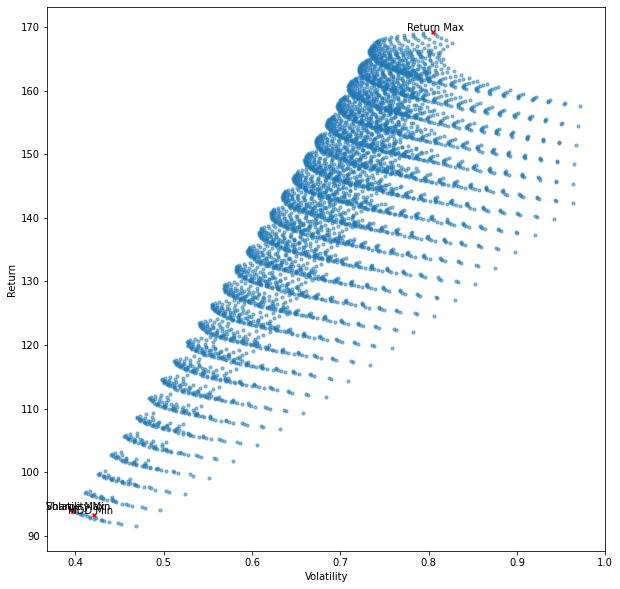

In [5]:
Analysis(all_array_for_sort)
Scatter(all_array_for_sort) # mdd min, vol min, sharp max, return max